# Linear Regression - Try

## Preparation

### Importing relevant packages:

In [2]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

### Defining the data

In [3]:
x_train = np.array([1.2, 2.5, 3.9, 5.4, 6.8, 8.1, 9.3, 10.3])
y_train = np.array([5.9, 6.8, 7.2, 7.7, 8.4, 9.1, 9.5, 9.8])

In [4]:
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
print(x_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (8,), X Type:<class 'numpy.ndarray'>)
[ 1.2  2.5  3.9  5.4  6.8  8.1  9.3 10.3]
y Shape: (8,), y Type:<class 'numpy.ndarray'>)
[5.9 6.8 7.2 7.7 8.4 9.1 9.5 9.8]


### Define the initial w and b

In [5]:
w_init = 1
b_init = 0

### (Optional) Z-Score Normalization to make the machine learning process faster

In [6]:
def z_score_normal(x):
    mu = np.mean(x)
    sgm = np.std(x)
    x_z = (x - mu) / sgm
    return x_z

In [7]:
x_z = z_score_normal(x_train)
y_z = z_score_normal(y_train)
print(x_z)
print(y_z)

[-1.55287446 -1.12675587 -0.66785893 -0.17618365  0.28271329  0.70883188
  1.10217211  1.42995563]
[-1.65999659 -0.9651143  -0.65627772 -0.270232    0.270232    0.81069601
  1.11953258  1.35116001]


### Plot the data onto a scatter plot

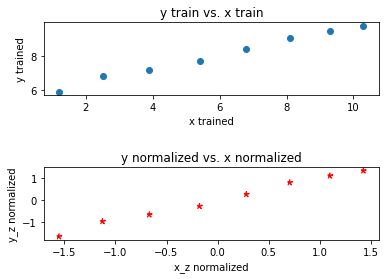

In [8]:
fig = plt.figure(1)
ax1=plt.subplot(2,1,1)
plt.scatter(x_train,y_train,marker='o')
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
ax2=plt.subplot(2,1,2)
plt.scatter(x_z,y_z,color="r",marker="*",linestyle="dashed")
plt.xlabel("x_z normalized")
plt.ylabel("y_z normalized")
plt.title('y normalized vs. x normalized')
plt.subplots_adjust(wspace=0,hspace=1)
plt.show()

## Set up the model

In [9]:
def predict(x,w,b):
    p = w * x + b
    return p

Text(0.5, 1.0, 'y train vs. x train')

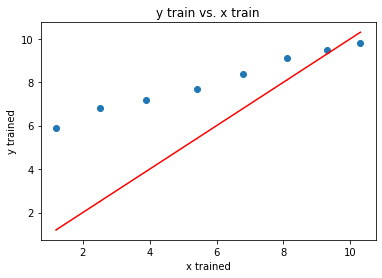

In [21]:
f_wb = predict(x_train,w_init,b_init)
plt.scatter(x_train,y_train,marker='o')
plt.plot(x_train,f_wb,marker='o',markersize=0.1,color="r")
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')

### Set up the cost function

In [11]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = predict(x[i],w,b)
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2*m)
    return cost

In [12]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at initial w : {cost}')

Cost at initial w : 3.788125


### Set up the Gradient Descent

In [13]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        f_wb_i = predict(x[i],w,b)
        dj_dw = dj_dw + (f_wb_i - y[i]) * x[i]
        dj_db = dj_db + (f_wb_i - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [14]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -2.1125000000000003
dj_dw at initial w,b: -7.17125


In [15]:
def gradient_descent(x,y,w_int,b_int,cost_func,gradient_func,alpha,iteration): 
    w = copy.deepcopy(w_int)
    b = b_int
    J = cost_func(x,y,w_int,b_int)
    for i in range(iteration):
        dj_dw,dj_db = gradient_func(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = cost_func(x,y,w,b)
        if i% math.ceil(iteration / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J}")
    return w,b,J

### Test the implement

In [16]:
initial_w = 1
initial_b = 0
alpha = 5e-3
iteration = 10000

w_final, b_final,J = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iteration)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 3.5396276341963144
Iteration 1000: Cost 0.41388970025843985
Iteration 2000: Cost 0.058919290052385005
Iteration 3000: Cost 0.013364378202553005
Iteration 4000: Cost 0.007518116277675127
Iteration 5000: Cost 0.006767839806787594
Iteration 6000: Cost 0.006671553531899341
Iteration 7000: Cost 0.006659196691332465
Iteration 8000: Cost 0.006657610883708547
Iteration 9000: Cost 0.006657407370050952
b,w found by gradient descent: 5.54,0.42287729023548026 


### Draw the diagram

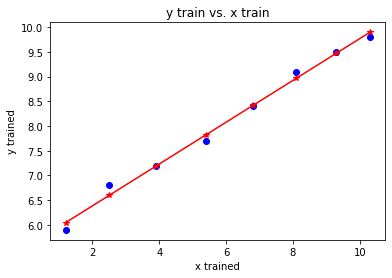

In [17]:
plt.scatter(x_train,y_train,color="b",marker='o')
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
f_final = predict(x_train,w_final,b_final)
plt.plot(x_train,f_final,color="r",marker="*",)

## Do the prediction

Predicted value for x = 13 is 11.036531447018659


Text(13, 12.036531447018659, 'This is the predict value')

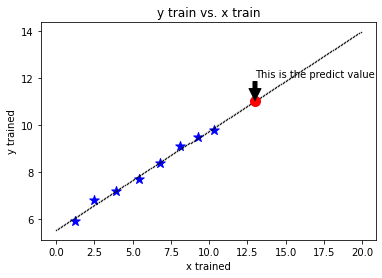

In [18]:
x_value = 13
y_predict = predict(x_value,w_final,b_final)
print(f"Predicted value for x = {x_value} is {y_predict}")
plt.scatter(x_train,y_train,color="b",marker='*',s=100)
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
x = np.arange(0, 20, 0.1)
y = predict(x,w_final,b_final)
plt.plot(x,y,color="black",marker=".",linewidth=0.1,markersize=1)
plt.plot(x_value,y_predict,color="r",marker="o",markersize=10)
plt.annotate("This is the predict value", xy=(x_value,y_predict), xytext=(x_value, y_predict+1),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )